In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the data from csv
# contains the user data
health_df = pd.read_csv('/content/drive/MyDrive/chrolopleth/user_personal_health_d.csv')

# contains site data
site_df = pd.read_csv('/content/drive/MyDrive/chrolopleth/bq-results-20230707-122643-1688733557518.csv')

### Working with user data

In [ ]:
health_df.head(5)

,Name,Date of Birth,Longitude,Latitude,Health Conditions,Health Status,Activities
0,Diamond Carpenter,1992-08-06,32.46346,0.35319,High Blood Pressure,Sick,Walking
1,Kelly Cross,1980-08-13,32.45768,0.38280,High Blood Pressure,Sick,Cycling
2,Alexander Lloyd DDS,1983-08-15,32.53425,0.32168,None,Healthy,Running
3,Sophia Moore,1967-07-05,32.44267,0.36293,None,Healthy,Walking
4,Erin Wright,1970-11-21,32.57269,0.26144,Pneumonia,Sick,Cycling


In [ ]:
health_df.shape

(1500, 7)

In [ ]:
health_df.dtypes

Name                  object
Date of Birth         object
Longitude            float64
Latitude             float64
Health Conditions     object
Health Status         object
Activities            object
dtype: object

In [ ]:
# convert to datetime before subtracting
health_df['Date of Birth'] = health_df['Date of Birth'].apply('{:06}'.format)

In [ ]:
now = pd.Timestamp('now')
health_df['Date of Birth'] = pd.to_datetime(health_df['Date of Birth'])
health_df['age'] = (now - health_df['Date of Birth']).astype('<m8[Y]').astype(int)

In [ ]:
health_df = health_df.drop(columns=['Name', 'Date of Birth'])
health_df.head(5)

,Longitude,Latitude,Health Conditions,Health Status,Activities,age
0,32.46346,0.35319,High Blood Pressure,Sick,Walking,31
1,32.45768,0.38280,High Blood Pressure,Sick,Cycling,43
2,32.53425,0.32168,None,Healthy,Running,40
3,32.44267,0.36293,None,Healthy,Walking,56
4,32.57269,0.26144,Pneumonia,Sick,Cycling,52


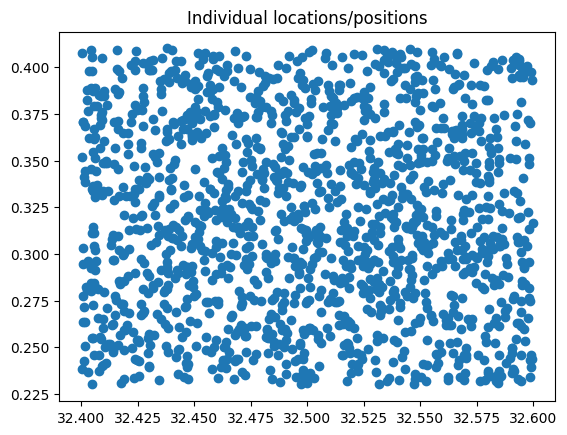

In [ ]:
plt.scatter(x=health_df['Longitude'], y=health_df['Latitude'])
plt.title('Individual locations/positions')
plt.show()

\
\
\
\
.

### Working with site data
This data contains the information about the devices and the sites plus the pm values measured by those devices and the times

In [ ]:
# get hold of all the data
# site_df.head(4)
site_df1 = site_df[['timestamp', 'site_name', 'site_latitude', 'site_longitude', 'pm2_5']]

# """ use df2 as variable for site_df1"""
df2 = site_df1.copy()
df2

,timestamp,site_name,site_latitude,site_longitude,pm2_5
0,2023-03-07 02:00:00 UTC,"Civic Centre, Kampala Central",0.31400,32.590,NaN
1,2023-03-08 07:00:00 UTC,"Civic Centre, Kampala Central",0.31400,32.590,NaN
2,2023-03-28 12:00:00 UTC,"Civic Centre, Kampala Central",0.31400,32.590,NaN
3,2023-03-10 16:00:00 UTC,"Civic Centre, Kampala Central",0.31400,32.590,NaN
4,2023-03-08 04:00:00 UTC,"Civic Centre, Kampala Central",0.31400,32.590,NaN
...,...,...,...,...,...
250454,2023-02-21 12:00:00 UTC,"Bukasa, Kira Municipality",0.29875,32.615,28.766628
250455,2023-02-23 03:00:00 UTC,"Bukasa, Kira Municipality",0.29875,32.615,48.872955
250456,2023-02-25 00:00:00 UTC,"Bukasa, Kira Municipality",0.29875,32.615,39.800341
250457,2023-02-05 06:00:00 UTC,"Bukasa, Kira Municipality",0.29875,32.615,37.814419


In [ ]:
df2.shape, df2.dtypes

((250459, 5),
 timestamp          object
 site_name          object
 site_latitude     float64
 site_longitude    float64
 pm2_5             float64
 dtype: object)

In [ ]:
# check for null values in the site data
df2.isnull().sum()

timestamp             0
site_name             0
site_latitude         0
site_longitude        0
pm2_5             56882
dtype: int64

#### Cleaning site data

In [ ]:
# drop all rows with missing values
df2 = df2.dropna()

# shape of the remaining df
df2.shape

(193577, 5)

In [ ]:
df2.describe()

,site_latitude,site_longitude,pm2_5
count,193577.000000,193577.000000,193577.000000
mean,0.330451,32.593649,48.974798
std,0.038444,0.034450,34.178196
min,0.233600,32.528000,1.097500
25%,0.298750,32.568643,27.069700
50%,0.332610,32.590750,41.046250
75%,0.356400,32.615000,59.851395
max,0.405320,32.677810,608.673164


In [ ]:
# check the number of sites and the locations:
print(len(df2['site_longitude'].unique()))
len(df2['site_name'].unique())

51


51

This (51) is the number of sites (site_names) present in the data so if we take the average of the pm in those sites, only 51 will remain
and it might not be representative of the data i.e we are restricting ourselves to only 51 pm values. \


In [ ]:
df2.head(5)

,timestamp,site_name,site_latitude,site_longitude,pm2_5
504,2023-03-04 04:00:00 UTC,"Rubaga, Kampala",0.295314,32.553682,53.227143
505,2023-03-03 23:00:00 UTC,"Rubaga, Kampala",0.295314,32.553682,51.940116
506,2023-03-06 02:00:00 UTC,"Rubaga, Kampala",0.295314,32.553682,31.805114
507,2023-03-20 21:00:00 UTC,"Rubaga, Kampala",0.295314,32.553682,51.213023
508,2023-03-19 23:00:00 UTC,"Rubaga, Kampala",0.295314,32.553682,10.283750


In [ ]:
# pick random pm value of a day
# df2 = df2[df2['site_name'] == 'Rubaga, Kampala']
# df2

\
\
\
\
.

In [ ]:
# Convert 'timestamp' column to datetime
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

# Group by 'site' and date part of 'timestamp', then select random 'pm' value for each group
df2 = df2.groupby(['site_name', df2['timestamp'].dt.date], as_index=False).apply(lambda group: group.sample(n=1, random_state=40))

df2
# Reset the index of the resulting DataFrame and drop the time column
# df2.reset_index(drop=True, inplace=True)
# df2 = df2.drop(columns=['timestamp'])

,,timestamp,site_name,site_latitude,site_longitude,pm2_5
0,57486,2023-01-01 12:00:00+00:00,"Banda, Kampala",0.341674,32.635306,22.860179
1,57767,2023-01-02 11:00:00+00:00,"Banda, Kampala",0.341674,32.635306,14.792222
2,57567,2023-01-03 08:00:00+00:00,"Banda, Kampala",0.341674,32.635306,14.234130
3,57547,2023-01-04 09:00:00+00:00,"Banda, Kampala",0.341674,32.635306,7.531304
4,57550,2023-01-05 14:00:00+00:00,"Banda, Kampala",0.341674,32.635306,18.578913
...,...,...,...,...,...,...
3389,30837,2023-03-26 09:00:00+00:00,wabigalo,0.309910,32.600450,3.828953
3390,30674,2023-03-27 12:00:00+00:00,wabigalo,0.309910,32.600450,8.163995
3391,30772,2023-03-28 15:00:00+00:00,wabigalo,0.309910,32.600450,10.632333
3392,30715,2023-03-29 12:00:00+00:00,wabigalo,0.309910,32.600450,5.351875


In [ ]:
# df2
df2.describe()

,site_latitude,site_longitude,pm2_5
count,3394.000000,3394.000000,3394.000000
mean,0.329868,32.600240,45.777568
std,0.040980,0.037383,35.070435
min,0.233600,32.528000,1.350000
25%,0.298330,32.571320,23.639563
50%,0.332610,32.597154,37.798883
75%,0.357987,32.625830,55.974908
max,0.405320,32.677810,449.192375


\
\
.

" Notes"

When mean() is used to obtain the pm value, a lot of information is lost therein. for example consider a pm values of [1, 3, 80], when mean is obtained, the resulting value  lies between 20 and 30. \
When such scenarios go on over and over, all you have is points between 20 and 40 which is not representative of the entire dataset. \
 \
Instead we have chosen to use the mode though still not good but better representative of the dataset to an extent.

In [ ]:
""" MEAN """

site_ave_df = df2.groupby('site_name').agg({'site_latitude': 'mean', 'site_longitude': 'mean', 'pm2_5': 'mean'}).reset_index()

In [ ]:
site_ave_df.describe()

,site_latitude,site_longitude,pm2_5
count,51.000000,51.000000,51.000000
mean,0.329463,32.600051,47.213930
std,0.040974,0.036752,17.178133
min,0.233600,32.528000,25.805221
25%,0.298540,32.572160,36.517744
50%,0.332610,32.597154,43.965553
75%,0.357194,32.623050,51.447725
max,0.405320,32.677810,108.496742


In [ ]:
""" MODE """

site_mode_df = df2.groupby(['site_name', 'site_latitude', 'site_longitude'])['pm2_5'].apply(lambda x: x.mode().iloc[0]).reset_index()
# site_mode_df = df2.groupby('site_name').agg({'site_latitude': 'mean', 'site_longitude': 'mean', 'pm2_5': 'mode'}).reset_index()

In [ ]:
site_mode_df.describe()

,site_latitude,site_longitude,pm2_5
count,52.000000,52.000000,52.000000
mean,0.329324,32.599586,8.922506
std,0.040583,0.036544,7.711279
min,0.233600,32.528000,1.350000
25%,0.298645,32.572580,4.607821
50%,0.332610,32.594697,6.173814
75%,0.356797,32.621660,9.791942
max,0.405320,32.677810,36.148590


The mode is likely not to be of significant importance going forward.

 \


In [ ]:
""" Random pm Value for a site_name """

site_df_r = df2.groupby(['site_name', 'site_latitude', 'site_longitude'], as_index=False).apply(lambda group: group.sample(n=1, random_state=40))
site_df_r.describe()

,site_latitude,site_longitude,pm2_5
count,52.000000,52.000000,52.000000
mean,0.329324,32.599586,47.823258
std,0.040583,0.036544,42.451682
min,0.233600,32.528000,8.794048
25%,0.298645,32.572580,19.269100
50%,0.332610,32.594697,36.856242
75%,0.356797,32.621660,52.512988
max,0.405320,32.677810,228.653000


## Visualization

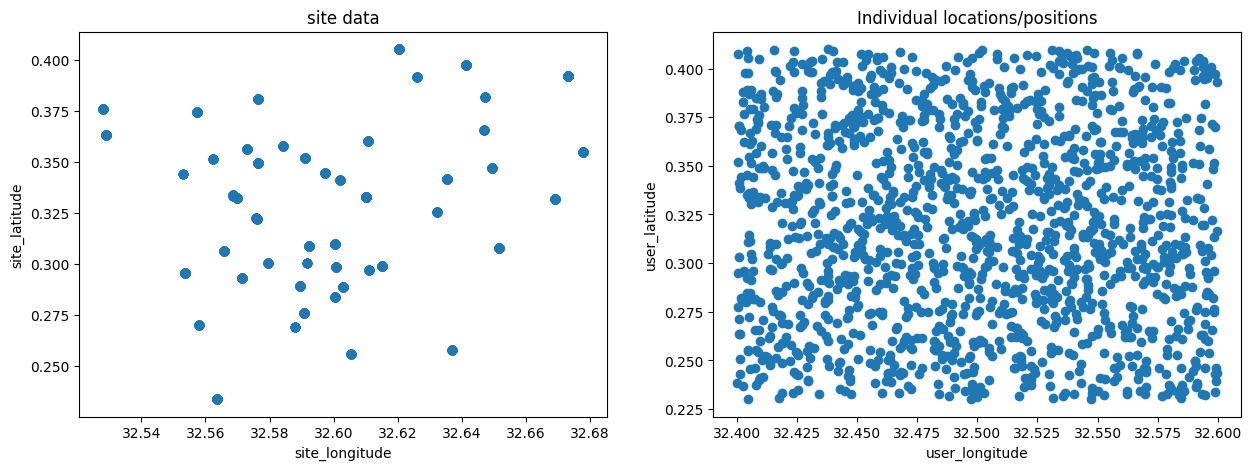

In [ ]:
""" Side by side comparison of the two data points  """

# figsize() function to adjust the size
# of function
plt.subplots(figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)
plt.scatter(x=df2['site_longitude'], y=df2['site_latitude'])
plt.title('site data')
plt.xlabel('site_longitude')
plt.ylabel('site_latitude')

# using subplot function and creating plot two
plt.subplot(1, 2, 2)
plt.scatter(x=health_df['Longitude'], y=health_df['Latitude'])
plt.title('Individual locations/positions')
plt.xlabel('user_longitude')
plt.ylabel('user_latitude')

# show plot
plt.show()

(0.22, 0.41)

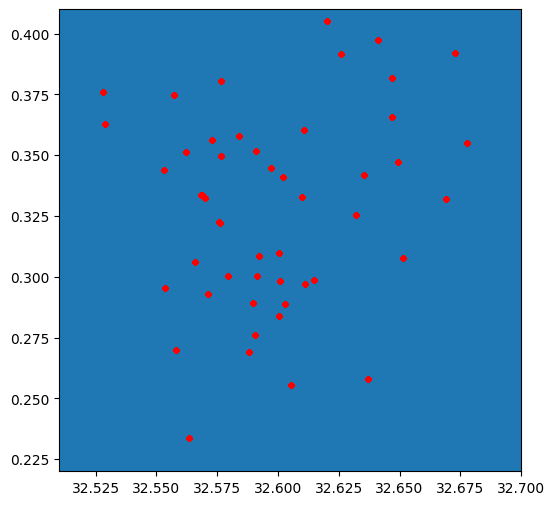

In [ ]:
""" visualization using geopandas on the earth map: on inspection it is similar to the one obtained above using scatter plot"""

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt


geometry = [Point(xy) for xy in zip(df2['site_longitude'], df2['site_latitude'])]
gdf = GeoDataFrame(df2, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

minx, miny, maxx, maxy = (32.51, 0.22, 32.70, 0.41)

# Create a plot with the specified extent
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax)
gdf.plot(ax=ax, marker='o', color='red', markersize=10)

# gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=10)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)


## Wrangling
Combine from both data sets into single data set

1. ### Use of Proximity to compare latitude and longitude
Combining the two tables by comparison of log and lat of df1 and log, lat and pm25 of site_data

In [ ]:
# check the data of both dataframes and create new dfs containing only the latitude and longitude
site_df_ll = site_df_r[['site_latitude', 'site_longitude', 'pm2_5']]
site_df_ll.head(4)

,,,site_latitude,site_longitude,pm2_5
0,27,58324,0.341674,32.635306,17.807660
1,130,229249,0.392050,32.672980,13.938333
2,198,169836,0.298750,32.615000,8.794048
3,304,1798,0.351700,32.591000,31.635897


In [ ]:
health_ll = health_df[['Latitude', 'Longitude']]
health_ll.head(4)

,Latitude,Longitude
0,0.35319,32.46346
1,0.38280,32.45768
2,0.32168,32.53425
3,0.36293,32.44267


In [ ]:
# convert the newly created dfs into geodataframes (Convert DataFrames to GeoDataFrames)

site_gdf = gpd.GeoDataFrame(site_df_ll, geometry=gpd.points_from_xy(site_df_ll.site_longitude, site_df_ll.site_latitude ))
health_gdf = gpd.GeoDataFrame(health_ll, geometry=gpd.points_from_xy( health_ll.Longitude, health_ll.Latitude))

In [ ]:
health_gdf.head()

,Latitude,Longitude,geometry
0,0.35319,32.46346,POINT (32.46346 0.35319)
1,0.38280,32.45768,POINT (32.45768 0.38280)
2,0.32168,32.53425,POINT (32.53425 0.32168)
3,0.36293,32.44267,POINT (32.44267 0.36293)
4,0.26144,32.57269,POINT (32.57269 0.26144)


In [ ]:
# Perform spatial join to find nearest points and obtain 'pm2_5'

result = gpd.sjoin_nearest(health_gdf, site_gdf, how="left", rsuffix='_site', distance_col="distances")
result.tail(4)

,Latitude,Longitude,geometry,index__site0,index__site1,index__site2,site_latitude,site_longitude,pm2_5,distances
1496,0.30743,32.44210,POINT (32.44210 0.30743),44,2858,119801,0.363000,32.529000,42.865978,0.103149
1497,0.39020,32.51408,POINT (32.51408 0.39020),43,2820,192403,0.375900,32.528000,28.639000,0.019956
1498,0.36283,32.58404,POINT (32.58404 0.36283),22,1587,19751,0.357987,32.584100,36.169091,0.004843
1499,0.27325,32.43655,POINT (32.43655 0.27325),47,3098,37219,0.295314,32.553682,29.064886,0.119192


In [ ]:
result.shape, health_df.shape

((1500, 10), (1500, 6))

In [ ]:
result.dtypes

Latitude           float64
Longitude          float64
geometry          geometry
index__site0         int64
index__site1         int64
index__site2         int64
site_latitude      float64
site_longitude     float64
pm2_5              float64
distances          float64
dtype: object

In [ ]:
final_df = pd.concat([health_df, result], axis=1)

In [ ]:
# final_df = final_df[['age', 'Health Conditions', 'Health Status', 'Activities', 'Latitude', 'Longitude', 'pm2_5']].T.drop_duplicates().T

final_df = final_df.loc[:, ~ final_df.columns.duplicated()]
final_df = final_df[['age', 'Health Conditions', 'Health Status', 'Activities', 'Latitude', 'Longitude', 'pm2_5']]

\
\
.

1. ### Import and Use Postgres data
Combining based on comparison with geometry values in the postgre db

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/chrolopleth/predictions5.csv", usecols=[0, 1, 4], names=['parish', 'pm2_5', 'geometry'])
df.head(3)

,parish,pm2_5,geometry
0,Agago,30.920332,0103000020E6100000010000002C180000C0C32CA250B5...
1,Amuria,29.071835,0103000020E610000001000000421C000010ACAA04FCB8...
2,Apac Municipality,37.867565,0103000020E610000001000000B700000000E6A4AEF748...


In [ ]:
# check null values in data frame
df.isnull().sum()

parish      0
pm2_5       0
geometry    0
dtype: int64

In [ ]:
from shapely.wkb import loads


def get_lat_log(row):
  """ function to convert the geometry column to latitude and longitude """

  geometry = loads(bytes.fromhex(row['geometry']))
  if geometry.geom_type == "Point":
    return pd.Series({'Latitude': geometry.y, 'Longitude': geometry.x})
  else:
    centroid = geometry.centroid
    return pd.Series({'Latitude': centroid.y, 'Longitude': centroid.x})


In [ ]:
df[['site_Latitude', 'site_Longitude']] = df.apply(get_lat_log, axis=1)
n_site_df = df[['site_Latitude', 'site_Longitude', 'pm2_5']]

In [ ]:
n_site_df.shape, health_ll.shape

((16863, 3), (1500, 2))

In [ ]:
n_site_df.describe()

,site_Latitude,site_Longitude,pm2_5
count,16863.000000,16863.000000,16863.000000
mean,0.519377,32.328622,32.536984
std,0.848095,0.939310,20.656209
min,-1.334703,29.680012,5.670000
25%,0.315722,32.398189,17.770000
50%,0.315722,32.596960,27.430000
75%,0.501269,32.654114,38.119004
max,3.728054,34.876329,195.980000


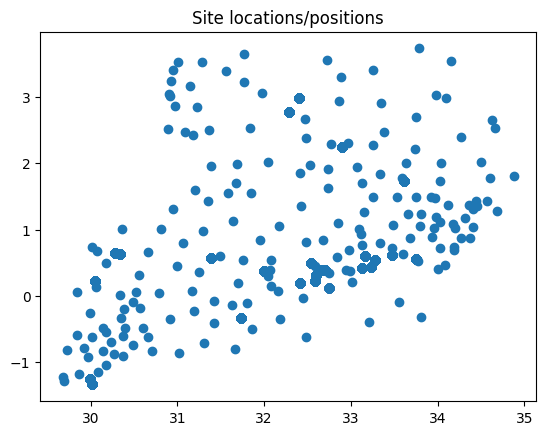

In [ ]:
plt.scatter(x=n_site_df['site_Longitude'], y=n_site_df['site_Latitude'])
plt.title('Site locations/positions')
plt.show()

In [ ]:
import geopandas as gpd
from geopandas import GeoDataFrame

In [ ]:
# Convert df1 and df2 to GeoDataFrames
health_gdf = gpd.GeoDataFrame(health_ll, geometry=gpd.points_from_xy(health_ll['Longitude'], health_ll['Latitude']))
new_site_gdf = gpd.GeoDataFrame(n_site_df, geometry=gpd.points_from_xy(n_site_df['site_Longitude'], n_site_df['site_Latitude']))

# Perform spatial join
result = gpd.sjoin_nearest(health_gdf, new_site_gdf, how='left', distance_col='distances')

In [ ]:
result.head(4)

,Latitude,Longitude,geometry,index_right,site_Latitude,site_Longitude,pm2_5,distances
0,0.35319,32.46346,POINT (32.46346 0.35319),9892,0.315722,32.59696,58.60,0.138658
0,0.35319,32.46346,POINT (32.46346 0.35319),9891,0.315722,32.59696,52.30,0.138658
0,0.35319,32.46346,POINT (32.46346 0.35319),9890,0.315722,32.59696,22.99,0.138658
0,0.35319,32.46346,POINT (32.46346 0.35319),9889,0.315722,32.59696,55.99,0.138658


In [ ]:
# result.tail(20)
result = result[['Latitude', 'Longitude', 'pm2_5']]
# result_df = result.groupby(['Latitude', 'Longitude'])['pm2_5'].mean().reset_index()
result_df = result.groupby(['Latitude', 'Longitude'])['pm2_5'].apply(lambda x: x.mode().iloc[0]).reset_index()
result_df.shape

(1500, 3)

In [ ]:
# todo: different ways to handle the repeating longitude and latitude. [ either by getting the average or something else ]
health_df = health_df[['age', 'Health Conditions', 'Health Status', 'Activities']]
final_df1 = pd.concat([health_df, result_df],axis=1)

In [ ]:
final_df1

,age,Health Conditions,Health Status,Activities,Latitude,Longitude,pm2_5
0,31,High Blood Pressure,Sick,Walking,0.23004,32.49730,27.495247
1,43,High Blood Pressure,Sick,Cycling,0.23010,32.40477,30.920332
2,40,None,Healthy,Running,0.23010,32.54709,27.495247
3,56,None,Healthy,Walking,0.23048,32.53162,27.495247
4,52,Pneumonia,Sick,Cycling,0.23066,32.58451,27.495247
...,...,...,...,...,...,...,...
1495,52,Asthma,Sick,Cycling,0.40942,32.41563,26.937466
1496,51,None,Healthy,Swimming,0.40944,32.50194,30.294247
1497,38,Lung cancer,Sick,Cycling,0.40957,32.54557,30.294247
1498,33,Asthma,Sick,Swimming,0.40961,32.53105,30.294247


Summary of the two dataframes obtained i.e. one from use of postgres data and the other in the provided dataset

In [ ]:
# obtained as a result of provided df

final_df.describe()

,age,Latitude,Longitude,pm2_5
count,1500.00000,1500.000000,1500.000000,1500.000000
mean,38.37400,0.318959,32.499802,39.626069
std,12.23042,0.050717,0.057222,20.628304
min,18.00000,0.230040,32.400090,11.275000
25%,28.00000,0.276870,32.450347,28.639000
50%,38.00000,0.316375,32.499650,42.865978
75%,49.00000,0.362455,32.547675,46.793462
max,61.00000,0.410000,32.599730,199.084800


In [ ]:
# obtained as a result of postgres data

final_df1.describe()

,age,Latitude,Longitude,pm2_5
count,1500.00000,1500.000000,1500.000000,1500.000000
mean,38.37400,0.318959,32.499802,32.990476
std,12.23042,0.050717,0.057222,4.428828
min,18.00000,0.230040,32.400090,26.937466
25%,28.00000,0.276870,32.450347,30.294247
50%,38.00000,0.316375,32.499650,30.920332
75%,49.00000,0.362455,32.547675,37.867565
max,61.00000,0.410000,32.599730,37.867565


In [ ]:
""" Air Quality ranges: Effort to use categories for the model instead of numerical values """

# 0-12 : green
# 12.1-35.4: yellow
# 35.5-55.4: orange
# 55.5-150.4:red
# 150.5-250.4: Purple
# 250.5-Higher: maroon

' Air Quality ranges: Effort to use categories for the model instead of numerical values '

In [ ]:

def categorize_pm(pm_value):
  """ function to categorize pm values """

  if pm_value <= 12:
    return 'good'
  elif 12.1 <= pm_value <= 35.4:
    return 'moderate'
  elif 35.5 <= pm_value <=55.4:
    return 'Unhealthy for sensitive groups'
  elif 55.5 <= pm_value <= 150.4:
    return 'Unhealthy'
  elif 150.5 <= pm_value <= 250.4:
    return 'Very unhealthy'
  else:
    return 'Harzardous'

final_df['pm_category'] = final_df['pm2_5'].apply(categorize_pm)

In [ ]:
final_df['pm_category'].unique()

array(['Unhealthy for sensitive groups', 'moderate', 'Unhealthy', 'good',
       'Very unhealthy'], dtype=object)

In [ ]:
final_df

,age,Health Conditions,Health Status,Activities,Latitude,Longitude,pm2_5,pm_category
0,31,High Blood Pressure,Sick,Walking,0.35319,32.46346,42.865978,Unhealthy for sensitive groups
1,43,High Blood Pressure,Sick,Cycling,0.38280,32.45768,28.639000,moderate
2,40,None,Healthy,Running,0.32168,32.53425,66.694400,Unhealthy
3,56,None,Healthy,Walking,0.36293,32.44267,28.639000,moderate
4,52,Pneumonia,Sick,Cycling,0.26144,32.57269,52.189565,Unhealthy for sensitive groups
...,...,...,...,...,...,...,...,...
1495,52,Asthma,Sick,Cycling,0.28490,32.51496,29.064886,moderate
1496,51,None,Healthy,Swimming,0.30743,32.44210,42.865978,Unhealthy for sensitive groups
1497,38,Lung cancer,Sick,Cycling,0.39020,32.51408,28.639000,moderate
1498,33,Asthma,Sick,Swimming,0.36283,32.58404,36.169091,Unhealthy for sensitive groups


In [ ]:
final_df[final_df['pm_category'] == 'Very unhealthy'].shape

(10, 8)

In [ ]:
final_df['pm2_5'].unique()

array([ 42.86597826,  28.639     ,  66.6944    ,  52.18956522,
        29.06488636,  73.99257143,  36.16909091,  28.5       ,
        19.2757    ,  11.34966667,  52.0726    , 104.62348485,
        24.2843    ,  46.79346154,  16.535     , 109.79170732,
        19.2493    ,  36.389     ,  51.3846    ,  59.527625  ,
       199.0848    ,  68.17434783,  31.63589744,  53.48325581,
        37.32348485,  45.82486842, 114.82548387,  12.98014706,
        33.07      ,  16.4187    ,  17.9423    ,  11.275     ,
       101.8864    ,  39.55365854])

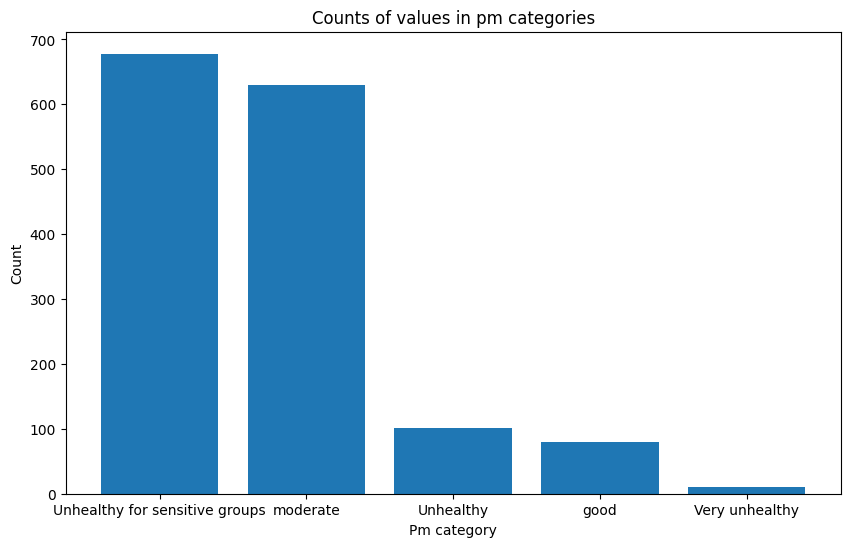

In [ ]:
# Get the counts of values in the 'category' column
value_counts = final_df['pm_category'].value_counts()

# Plot the counts on a bar chart
plt.figure(figsize=(10,6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Pm category')
plt.ylabel('Count')
plt.title('Counts of values in pm categories')
plt.show()

Count for each \
- Good 80 \
- Unhealthy 102 \
- Very Unhealthy 10 \
- Unh for SGs 678 \
- moderate 630

In [ ]:
""" these are columns that will be passed to the model """

data = final_df[['age','Health Conditions', 'Health Status', 'Activities', 'pm2_5', 'pm_category']]

## Model development

One hot encode the following columns [ health conditions, health status, activities ]. \

For the pm values, since this is a recommendation system, you can bring the corresponding category for each values forexample maybe good, moderate, sensitive and so on. Then one hot encode them too. \

For the age and some other values, you can choose to scale them using scaler.

For the lat and log, yet to find out!

Note: given the nature of the system, add another column titled preventive measure that will consist of the recommendation to give to the user forexample "None", "Stay indoors and close windows on days with severe air pollution", "Avoid outdoor activities during peak pollution hours", "Limit physical exertion during periods of high pollution", " "

#### Predict pm categories

In [ ]:
""" import packages """

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# separate features (X) and the target variable (y)

X = data.iloc[:, :-1]       # or data.drop(columns=['pm_category'], axis=1)
y = data['pm_category']

In [ ]:
""" one hot encode the columns with categorical features and drop the first columns to avoid the dummy variable trap """

categorical_colmns = ['Health Conditions', 'Health Status', 'Activities']
X_encoded = pd.get_dummies(X, columns=categorical_colmns, drop_first=True)
X_encoded.head(4)

,age,pm2_5,Health Conditions_Asthma,Health Conditions_Chronic,Health Conditions_High Blood Pressure,Health Conditions_None,Health Conditions_Pneumonia,Health Status_Sick,Activities_Running,Activities_Swimming,Activities_Walking
0,31,42.865978,0,0,1,0,0,1,0,0,1
1,43,28.639000,0,0,1,0,0,1,0,0,0
2,40,66.694400,0,0,0,1,0,0,1,0,0
3,56,28.639000,0,0,0,1,0,0,0,0,1


In [ ]:
""" split the dataset into training and test sets"""

Xtrain, Xtest, y_train, y_test = train_test_split(X_encoded, y,test_size=0.3, random_state=42)

In [ ]:
Xtrain.shape, y_train.shape
Xtest.shape, y_test.shape

((450, 11), (450,))

In [ ]:
""" fit and transform the X features by Scaling the values """

scaler = StandardScaler()
X_train = scaler.fit_transform(Xtrain)
X_test = scaler.transform(Xtest)

In [ ]:
""" fit and tranfrom the Y variables by Label Encoding them """

# instantiate labelencoder class
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

y_test = label_encoder.transform(y_test)

In [ ]:
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

{'Unhealthy': 0,
 'Unhealthy for sensitive groups': 1,
 'Very unhealthy': 2,
 'good': 3,
 'moderate': 4}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# models used: logistic regression, support vector machines, decision trees

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
clf = svm.SVC(kernel='linear')
tree = DecisionTreeClassifier()

# fit the model with data
logreg.fit(X_train, y_train)
clf.fit(X_train, y_train)
tree.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
y_pred_svm = clf.predict(X_test)
y_pred_dt = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy Logistic: ", accuracy_score(y_test, y_pred))
print("Accuracy SVM: ", accuracy_score(y_test, y_pred_svm))
print("Accuracy Tree: ", accuracy_score(y_test, y_pred_dt))

Accuracy Logistic:  0.9755555555555555
Accuracy SVM:  0.9977777777777778
Accuracy Tree:  0.9977777777777778


In [ ]:
print(confusion_matrix(y_test, y_pred_svm))

[[ 29   0   0   0   0]
 [  0 204   0   0   0]
 [  0   0   2   0   0]
 [  0   0   0  26   0]
 [  0   0   0   1 188]]


In [ ]:
def predict_new_value(age, pm, condition, status, activities):
  new_data = pd.Series({'age': age, 'pm2_5':pm, 'Health Conditions':condition, 'Health Status':status, 'Activities':activities})
  new_data_df = pd.DataFrame([new_data], columns=new_data.index)
  new_data_encoded = pd.get_dummies(new_data_df, columns=categorical_colmns, drop_first=True)
  new_data_encoded = new_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)
  new_data_scaled = scaler.transform(new_data_encoded)
  # new_data_scaled = np.expand_dims(new_data_scaled, axis=0)
  predicted_label_encoded = logreg.predict(new_data_scaled)
  predicted_label_original = label_encoder.inverse_transform(predicted_label_encoded)
  print(predicted_label_encoded)  # The predicted label as numerical encoding
  print(predicted_label_original)  # The predicted label as original category

predict_new_value(age=30, pm=175.675, condition='None', status='Healthy', activities='Cycling')

[2]
['Very unhealthy']


#### Air Recommendations

##### Creating Target columns

In [ ]:
final_df

,age,Health Conditions,Health Status,Activities,Latitude,Longitude,pm2_5,pm_category
0,31,High Blood Pressure,Sick,Walking,0.35319,32.46346,42.865978,Unhealthy for sensitive groups
1,43,High Blood Pressure,Sick,Cycling,0.38280,32.45768,28.639000,moderate
2,40,None,Healthy,Running,0.32168,32.53425,66.694400,Unhealthy
3,56,None,Healthy,Walking,0.36293,32.44267,28.639000,moderate
4,52,Pneumonia,Sick,Cycling,0.26144,32.57269,52.189565,Unhealthy for sensitive groups
...,...,...,...,...,...,...,...,...
1495,52,Asthma,Sick,Cycling,0.28490,32.51496,29.064886,moderate
1496,51,None,Healthy,Swimming,0.30743,32.44210,42.865978,Unhealthy for sensitive groups
1497,38,Lung cancer,Sick,Cycling,0.39020,32.51408,28.639000,moderate
1498,33,Asthma,Sick,Swimming,0.36283,32.58404,36.169091,Unhealthy for sensitive groups


Preventive measures: \

none ( no measure), \
Stay indoors and close windows on days with severe air pollution, \
Limit physical exertion during periods of high pollution, \
Stay informed about air quality forecasts and plan activities accordingly

In [ ]:
# read about suprise
"""

outdoor: cycling , running, swimming, walking

For instance, if the air quality is detected to be poor while a user with asthma is engaged in outdoor
activities, the model may suggest reducing physical exertion or relocating to a less polluted area.
++ > moderate & -> asthma & -> reduce physical exertion ""

Alternatively, if the user is indoors and the air quality is satisfactory, the model may recommend opening
windows for ventilation or engaging in activities that promote indoor air quality.
++ <=moderate & -> open windows for ventilation

"""
final_df

"""

poor, asthma, outdoor acitivites, reduce physical exertion or relocate to less polluted area
satisfactory, indoor , open windows for ventilation or engage in activites that promote indoor air quality
"""

'\n\npoor, asthma, outdoor acitivites, reduce physical exertion or relocate to less polluted area\nsatisfactory, indoor , open windows for ventilation or engage in activites that promote indoor air quality\n'

air quality        | activities | recommendation
-------------------|------------|-------------
Poor               | outdoor    | reduce physical exertion
Satisfactory       | indoor     | open windows for ventilation

In [ ]:
# Go ahead with model development

# first try to do the model like that without the recommendations

# write a script to assign appropriate recommendatiions based on the column values

# second try: use the obtained recommendations to get a model


In [ ]:
import random
# global age
df = pd.DataFrame()

def good():
    return 'Great day to be active outside' # even if sick

def moderate(health_status):
    if health_status == 'Healthy':
        # return 'Good day to be active outside. {activity} is good for your health'
        return 'Good day to be active outside'

    return random.choice(['Reduce prolonged or heavy outdoor exertion', 'Take more breaks during outdoor activities'])

def unhealthy_for_sensitive_groups(age, health_condition):
    if age > 45:
        return 'Reduce prolonged or heavy outdoor exertion'

    if health_condition in ['Asthma', 'Pneumonia', 'Lung cancer']:
        return 'keep quick relief medicine handy'

    return 'Good day to be active outside'

def unhealthy(health_status, age):
    if health_status == 'Healthy' and age < 45:
        return 'Reduce prolonged or heavy outdoor exertion'

    return random.choice(['Avoid prolonged/heavy outdoor exertion','reschedule for when air quality is better'])

def very_unhealthy(health_status, age):
    if health_status == 'Healthy' and age < 45:
        return random.choice(['Avoid prolonged/heavy outdoor exertion', 'reschedule for when air quality is better'])

    return random.choice(['Avoid all physical outdoor activities', 'reschedule for when air quality is better'])

def hazardous(health_status, age):
    if health_status == 'Healthy' and age < 45:
        return 'Remain indoors and keep activity levels low'

    return 'Avoid all physical outdoor activities'


def obtain_recommendation(age, health_status, health_condition, air_quality):
    if air_quality == 'good':
        return good()
    elif air_quality == 'moderate':
        return moderate(health_status)
    elif air_quality == 'Unhealthy for sensitive groups':
        return unhealthy_for_sensitive_groups(age, health_condition)
    elif air_quality == 'Unhealthy':
        return unhealthy(health_status, age)
    elif air_quality == 'Very unhealthy':
        return very_unhealthy(health_status, age)
    elif air_quality == 'Hazardous':
        return hazardous(health_status, age)
    else:
        return 'No recommendation'

def get_recommendation(row):
  return obtain_recommendation(row['age'], row['Health Status'], row['Health Conditions'], row['pm_category'])


df['recommendation'] = final_df.apply(get_recommendation, axis=1)


In [ ]:
# df

In [ ]:
df['recommendation'].unique()

array(['Good day to be active outside',
       'Reduce prolonged or heavy outdoor exertion',
       'keep quick relief medicine handy',
       'Take more breaks during outdoor activities',
       'Great day to be active outside',
       'reschedule for when air quality is better',
       'Avoid prolonged/heavy outdoor exertion',
       'Avoid all physical outdoor activities'], dtype=object)

In [ ]:
""" concatenate the two dataframes to form only one """

data = pd.concat([final_df, df], axis=1, join='inner')
data = data.drop(columns='pm2_5')
data

,age,Health Conditions,Health Status,Activities,Latitude,Longitude,pm_category,recommendation
0,31,High Blood Pressure,Sick,Walking,0.35319,32.46346,Unhealthy for sensitive groups,Good day to be active outside
1,43,High Blood Pressure,Sick,Cycling,0.38280,32.45768,moderate,Reduce prolonged or heavy outdoor exertion
2,40,None,Healthy,Running,0.32168,32.53425,Unhealthy,Reduce prolonged or heavy outdoor exertion
3,56,None,Healthy,Walking,0.36293,32.44267,moderate,Good day to be active outside
4,52,Pneumonia,Sick,Cycling,0.26144,32.57269,Unhealthy for sensitive groups,Reduce prolonged or heavy outdoor exertion
...,...,...,...,...,...,...,...,...
1495,52,Asthma,Sick,Cycling,0.28490,32.51496,moderate,Take more breaks during outdoor activities
1496,51,None,Healthy,Swimming,0.30743,32.44210,Unhealthy for sensitive groups,Reduce prolonged or heavy outdoor exertion
1497,38,Lung cancer,Sick,Cycling,0.39020,32.51408,moderate,Take more breaks during outdoor activities
1498,33,Asthma,Sick,Swimming,0.36283,32.58404,Unhealthy for sensitive groups,keep quick relief medicine handy


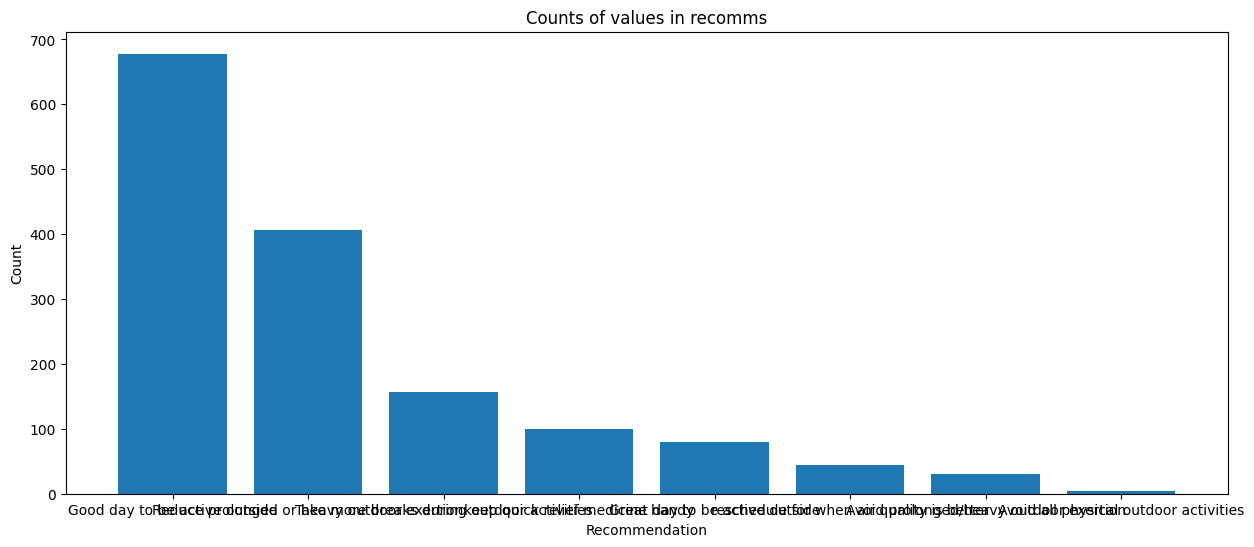

In [ ]:
# Get the counts of values in the 'col1' column
value_counts = data['recommendation'].value_counts()

# Plot the counts on a bar chart
plt.figure(figsize=(15,6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.title('Counts of values in recomms')
plt.show()

From the above chart, let me make some insights:
The recommendations don't correspond to the pm categories but rather were gotten based on the individual characteristics of the users.

In [ ]:
# data[data['recommendation'] == 'Take more breaks during outdoor activities']

##### Model development

In [ ]:
# data.head()
seed = 42
np.random.seed(seed)
random.seed(seed)

Need to encode the category is order of increasing negativity \
Need to also encode recommendation in that order \
For activities, one hot encode will work for the start \
For health conditions, one hot encode will work for the start \
For health status, one hot encode will work \

In [ ]:
""" steps to take """
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# separate features ( target and independent )
X = data.drop(columns=['recommendation'], axis=1)
y = data['recommendation']

In [ ]:
# one hot encode the X features
categorical_cols = ['Health Conditions', 'Health Status', 'Activities']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
# customize the label encode of the pm category

"""
custom_mapping = {'good': 0, 'moderate': 1, 'Unhealthy for sensitive groups': 2, 'Unhealthy': 3, 'Very unhealthy': 4}
label_encoder = LabelEncoder()
label_encoder.fit(list(custom_mapping.values()))
X_encoded['pm_category'] = X_encoded['pm_category'].map(custom_mapping)
"""

"\ncustom_mapping = {'good': 0, 'moderate': 1, 'Unhealthy for sensitive groups': 2, 'Unhealthy': 3, 'Very unhealthy': 4}\nlabel_encoder = LabelEncoder()\nlabel_encoder.fit(list(custom_mapping.values()))\nX_encoded['pm_category'] = X_encoded['pm_category'].map(custom_mapping)\n"

In [ ]:
# label encode without customization
label_encoder_pm = LabelEncoder()
X_encoded['pm_category'] = label_encoder_pm.fit_transform(X_encoded['pm_category'])

In [ ]:
# X_encoded.head(15)

In [ ]:
# X_encoded.head()

In [ ]:
X_encoded.head(1)

,age,Latitude,Longitude,pm_category,Health Conditions_Asthma,Health Conditions_Chronic,Health Conditions_High Blood Pressure,Health Conditions_None,Health Conditions_Pneumonia,Health Status_Sick,Activities_Running,Activities_Swimming,Activities_Walking
0,31,0.35319,32.46346,1,0,0,1,0,0,1,0,0,1


In [ ]:
# split the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, )

In [ ]:
X_traincol = X_train.columns

In [ ]:
# y_train[y_train['recommendation'] == 'Take more breaks during outdoor activities'].shape
# y_test[y_test['recommendation'] == 'Take more breaks during outdoor activities'].shape
# y_train.count(2)
np.count_nonzero(y_test == 0)

0

In [ ]:
# fit and transform X train and transform X test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# label encode y train and transform y test
label_encoder2 = LabelEncoder()
y_train = label_encoder2.fit_transform(y_train)
y_test = label_encoder2.transform(y_test)

In [ ]:
dict(zip(label_encoder2.classes_, label_encoder2.transform(label_encoder2.classes_)))

{'Avoid all physical outdoor activities': 0,
 'Avoid prolonged/heavy outdoor exertion': 1,
 'Good day to be active outside': 2,
 'Great day to be active outside': 3,
 'Reduce prolonged or heavy outdoor exertion': 4,
 'Take more breaks during outdoor activities': 5,
 'keep quick relief medicine handy': 6,
 'reschedule for when air quality is better': 7}

In [ ]:
# import necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# create an instance
logreg = LogisticRegression(random_state=42)
clf = svm.SVC(kernel='linear', random_state=42)
tree = DecisionTreeClassifier(random_state=42)
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='multi:softmax')
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=5)


In [ ]:
# fit model
logreg.fit(X_train, y_train)
clf.fit(X_train, y_train)
tree.fit(X_train, y_train)
bst.fit(X_train, y_train)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

##### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y_pred = logreg.predict(X_test)
y_pred_svm = clf.predict(X_test)
y_pred_tree = tree.predict(X_test)
preds = bst.predict(X_test)
y_pred_rf = classifier_rf.predict(X_test)


print(f"Accuracy for LR is {accuracy_score(y_test, y_pred)}")
print(f"Accuracy for svm is {accuracy_score(y_test, y_pred_svm)}")
print(f"Accuracy for tree is {accuracy_score(y_test, y_pred_tree)}")
print(f"Accuracy for xgboost is {accuracy_score(y_test, preds)}")
# accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy of random forest before optimization: ", accuracy_score(y_test, y_pred_rf))

Accuracy for LR is 0.7066666666666667
Accuracy for svm is 0.7377777777777778
Accuracy for tree is 0.88
Accuracy for xgboost is 0.84
Accuracy of random forest before optimization:  0.8422222222222222


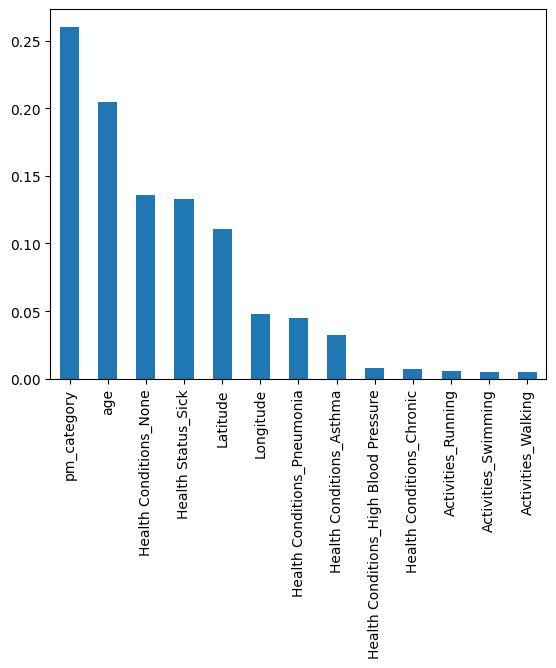

In [ ]:
""" random forest model feature importance """

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(classifier_rf.feature_importances_, index=X_traincol).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

This tells us that the pm_category and age, at the time of the call, were the biggest predictor in providing a recommendation.

##### Model Optimization

###### Random Forest tuning

In [ ]:
""" ________ random forest classifier __________ """

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)}

# Create a random forest classifier
forest_rf = RandomForestClassifier(random_state=42)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(forest_rf, param_distributions = param_dist, n_iter=5, cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 156}


Accuracy of random forest after optimization:  0.8644444444444445


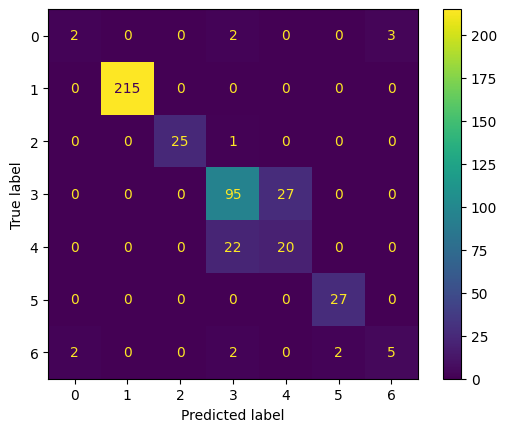

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate predictions with the best model
y_pred_rand_rf = best_rf.predict(X_test)
print("Accuracy of random forest after optimization: ", accuracy_score(y_test, y_pred_rand_rf))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rand_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:

print(classification_report(y_test, y_pred_rand_rf))

              precision    recall  f1-score   support

           1       0.50      0.29      0.36         7
           2       1.00      1.00      1.00       215
           3       1.00      0.96      0.98        26
           4       0.78      0.78      0.78       122
           5       0.43      0.48      0.45        42
           6       0.93      1.00      0.96        27
           7       0.62      0.45      0.53        11

    accuracy                           0.86       450
   macro avg       0.75      0.71      0.72       450
weighted avg       0.87      0.86      0.86       450



###### Decision Tree tuning using grid search

In [ ]:
"""_________ decision tree classifier ____________"""

# # get importance of the
# importance = tree.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#   print('Feature: %0d, Score: %.5f' % (i,v))

# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

'_________ decision tree classifier ____________'

\
Hyperparameter Tuning 1

In [ ]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [1, 2, 5, 10, 15]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 15}


In [ ]:
# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Fit the best model on the training data
best_clf.fit(X_train, y_train)
y_pred_tree_Opt = best_clf.predict(X_test)
print("Accuracy of decision tree after optimization: ", accuracy_score(y_test, y_pred_tree_Opt))

Accuracy of decision tree after optimization:  0.8822222222222222


In [ ]:
""" classification report """
print(classification_report(y_test, y_pred_tree_Opt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         7
           2       1.00      1.00      1.00       215
           3       1.00      1.00      1.00        26
           4       0.83      0.81      0.82       122
           5       0.49      0.52      0.51        42
           6       1.00      1.00      1.00        27
           7       0.53      0.73      0.62        11

    accuracy                           0.88       450
   macro avg       0.61      0.63      0.62       450
weighted avg       0.88      0.88      0.88       450



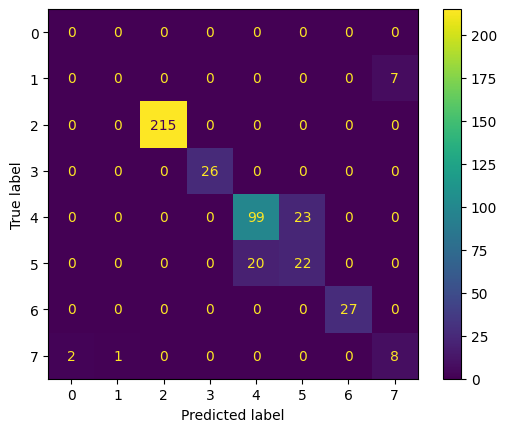

In [ ]:
""" confusion matrix """

from sklearn.metrics import ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_tree_Opt)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

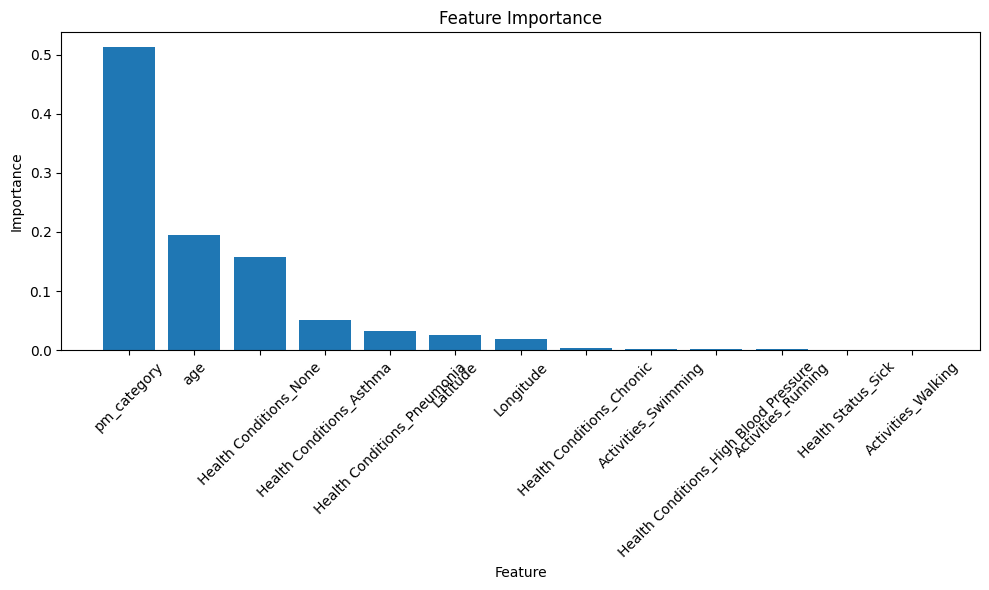

In [ ]:
""" Get feature importances """

feature_importances = best_clf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'feature': X_traincol ,'importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

\
Hyperparameter Tuning 2

In [ ]:
# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
# scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
model = DecisionTreeClassifier(random_state=42)
gs = GridSearchCV(model,
    param_grid={"min_samples_split": range(2, 403, 20)},
    n_jobs=-1,
    return_train_score=True,
)
gs.fit(X_train, y_train)
results = gs.cv_results_

# Create a variable for the best model
best_tree = gs.best_estimator_

y_pred_tree_Opt2 = best_tree.predict(X_test)
print("Accuracy of decision tree after optimization using different parameters: ", accuracy_score(y_test, y_pred_tree_Opt2))

Accuracy of decision tree after optimization using different parameters:  0.88


##### Prediction:

In [ ]:
X_encoded.columns

Index(['age', 'Latitude', 'Longitude', 'pm_category',
       'Health Conditions_Asthma', 'Health Conditions_Chronic',
       'Health Conditions_High Blood Pressure', 'Health Conditions_None',
       'Health Conditions_Pneumonia', 'Health Status_Sick',
       'Activities_Running', 'Activities_Swimming', 'Activities_Walking'],
      dtype='object')

In [ ]:
columns = ['age', 'Latitude', 'Longitude', 'pm_category',
       'Health Conditions_Asthma', 'Health Conditions_Chronic',
       'Health Conditions_High Blood Pressure', 'Health Conditions_None',
       'Health Conditions_Pneumonia', 'Health Status_Sick',
       'Activities_Running', 'Activities_Swimming', 'Activities_Walking']

X_encoded = pd.DataFrame(columns=columns)
X_encoded.columns

Index(['age', 'Latitude', 'Longitude', 'pm_category',
       'Health Conditions_Asthma', 'Health Conditions_Chronic',
       'Health Conditions_High Blood Pressure', 'Health Conditions_None',
       'Health Conditions_Pneumonia', 'Health Status_Sick',
       'Activities_Running', 'Activities_Swimming', 'Activities_Walking'],
      dtype='object')

In [ ]:
def predict(age, health_condition, health_status, pm_category, activities, latitude, longitude):
  data = {'age': age,
          'Health Conditions': health_condition,
          'Health Status': health_status,
          'Activities': activities,
          'Latitude': latitude,
          'Longitude':longitude,
          'pm_category': pm_category
          }

  data = pd.Series(data)
  data = pd.DataFrame([data], columns=data.index)
  categorical_cols = ['Health Conditions', 'Health Status', 'Activities']
  data_encoded = pd.get_dummies(data, columns=categorical_cols)
  data_encoded = data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

  # Ensure the columns in prediction data match the training data
  """
    missing_cols = set(X_encoded.columns) - set(data_encoded.columns)
    for col in missing_cols:
        data_encoded[col] = 0
    data_encoded = data_encoded[X_encoded.columns]"""

  custom_mapping = {'Unhealthy': 0, 'Unhealthy for sensitive groups': 1, 'Very unhealthy': 2, 'good': 3, 'moderate': 4}
  label_encoder_pm = LabelEncoder()
  label_encoder_pm.fit(list(custom_mapping.values()))
  data_encoded['pm_category'] = data_encoded['pm_category'].map(custom_mapping)
  # print(data_encoded.head())

  data_scaled = scaler.transform(data_encoded)
  predicted_label_encoded = best_rf.predict(data_scaled)
  predicted_label_original = label_encoder2.inverse_transform(predicted_label_encoded)
  print(predicted_label_encoded)
  print(predicted_label_original)


print(predict(20,'Asthma','Sick','Very unhealthy','Running',0.35319,32.46346))

[6]
['keep quick relief medicine handy']
None


In [ ]:
custom_mapping_inverse_recommendation = {0: 'Avoid all physical outdoor activities',
 1: 'Avoid prolonged/heavy outdoor exertion',
 2: 'Good day to be active outside',
 3: 'Great day to be active outside',
 4: 'Reduce prolonged or heavy outdoor exertion',
 5: 'Take more breaks during outdoor activities',
 6: 'keep quick relief medicine handy',
 7: 'reschedule for when air quality is better'}

predicted_label_encoded = [6]

predicted_label_original = [custom_mapping_inverse_recommendation[label] for label in predicted_label_encoded]
print(predicted_label_original)

['keep quick relief medicine handy']


##### Summary

Below is a summarised table with algorithms and the accuracy.

\begin{array}{|c|c|} \hline
\textbf{Algorithm}\;(model) & Optimization/Tuning & Grid/Random\; Search & \textbf{Accuracy} \\ \hline
Logistic\;Regression &  & no &  0.72 \\ \hline
Decision\;Tree Classifier & before & no & 0.88222 \\\hline
Decision\;Tree\;Classifier & after\;(hyperP\;1) & yes & 0.88 \\ \hline
Decision\;Tree\;Classifier & after\;(hyperP\;2) & yes & 0.87778 \\ \hline
Support\;Vector\;Machines &  & no & 0.75555 \\ \hline
Random\;Forest\;Classifier & before & no & 0.8311 \\ \hline
Random\;Forest\;Classifier & after & yes & 0.89111 \\ \hline
XGBClassifier &  & no & 0.84444 \\ \hline
\end{array}

Save the model

In [ ]:
from joblib import Parallel, delayed
import joblib
joblib.dump(best_rf, 'randomforestmodel.pkl')

In [ ]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

In [ ]:
# you will retrieve the model laka
# Load the model from the file
knn_from_joblib = joblib.load('randomforestmodel.pkl')

# Use the loaded model to make predictions
knn_from_joblib.predict(X_test)

In [ ]:
!pip show scikit-learn